In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:
ss = StandardScaler()

In [3]:
import numpy as np

In [4]:
X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                   [ 0.,  1., -1.]])

In [6]:
tf = ss.fit_transform(X_train)

In [8]:
tf[:,0].std()

0.9999999999999999

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
minmax = MinMaxScaler()

In [11]:
minmax.fit_transform(X_train)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

### Handling Outliers

In [12]:
from sklearn.datasets import make_blobs

In [25]:
features, col = make_blobs(centers=1, cluster_std=.90)
features[10,1]= 10
features[10,0] = 10

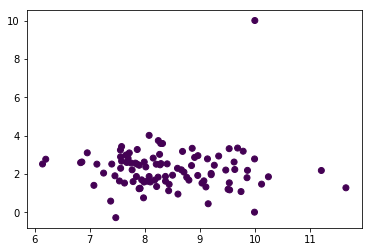

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features[:,0], features[:,1], c=col)

In [20]:
from sklearn.covariance import EllipticEnvelope

In [35]:
env = EllipticEnvelope(contamination=.05)

In [36]:
env.fit(features)

EllipticEnvelope(assume_centered=False, contamination=0.05, random_state=None,
         store_precision=True, support_fraction=None)

In [37]:
c = env.predict(features)

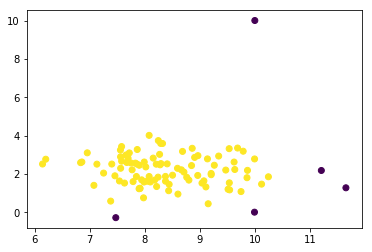

In [38]:
plt.scatter(features[:,0],features[:,1],c=c)

In [39]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

In [41]:
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

In [43]:
import pandas as pd
df = pd.DataFrame(measurements)

In [45]:
from  sklearn.feature_extraction  import DictVectorizer
dv = DictVectorizer()

In [46]:
dv.fit(measurements)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)

In [48]:
dv.transform(measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [50]:
dv.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

In [51]:
measurements

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

In [60]:
new_measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'London', 'temperature': 18.},
    {'city': 'Bangalore', 'temperature': 18.},
]

dv.transform(new_measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  1.,  0., 18.],
       [ 0.,  0.,  0., 18.]])

In [53]:
df.to_dict(orient='records')

[{'city': 'Dubai', 'temperature': 33.0},
 {'city': 'London', 'temperature': 12.0},
 {'city': 'San Francisco', 'temperature': 18.0}]

In [61]:
new_df = pd.DataFrame(new_measurements)

In [62]:
new_df

,city,temperature
0,Dubai,33.0
1,London,12.0
2,London,18.0
3,Bangalore,18.0


In [55]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()

In [64]:
le.fit(df.city)

LabelEncoder()

In [66]:
#le.transform(new_df.city)

In [67]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]

In [70]:
df = pd.DataFrame({'text':corpus,'sentiment':[0,1,1,0]})

In [71]:
df

,sentiment,text
0,0,This is the first document awesome food.
1,1,This is the second second document.
2,1,And the third one the is mission impossible.
3,0,Is this the first document?


In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
cv = CountVectorizer(stop_words='english')

In [120]:
cv.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [121]:
cv.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [122]:
cv.transform(df.text).toarray()

array([[1, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 2],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

### TfIdf

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [124]:
tfidfv = TfidfVectorizer(stop_words='english')

In [125]:
np.round(tfidfv.fit_transform(df.text).toarray(),2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [126]:
tfidfv.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

In [127]:
tfidft = TfidfTransformer()

In [128]:
np.round(tfidft.fit_transform(cv.transform(df.text)).toarray(),2)

array([[0.64, 0.41, 0.64, 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.  , 0.  , 0.  , 0.95],
       [0.  , 0.  , 0.  , 0.71, 0.71, 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [129]:
from  sklearn.preprocessing import FunctionTransformer

In [132]:
ft = FunctionTransformer(func=lambda x:x+2)

In [135]:
ft.fit_transform(df[['sentiment']])

array([[2],
       [3],
       [3],
       [2]], dtype=int64)

In [136]:
df.sentiment

0    0
1    1
2    1
3    0
Name: sentiment, dtype: int64